In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
meta = pd.read_csv("../../metadata/supp1_tab2.csv")
meta.head()

,sample_id,geographic_cohort,geographic_cohort_colour,geographic_cohort_shape,PCA_cohort,PCA_cohort_colour,mitochondrial_id,karyotype_3La,karyotype_3Ra,karyotype_3Rb,karyotype_2Ra,karyotype_2Rh,median_coverage
0,VBS24195,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,3R+/a,3Rb/b,2Ra/a,2R+/+,36
1,VBS24196,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,3Ra/a,3Rb/b,2Ra/a,2R+/+,30
2,VBS24197,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,3R+/a,3Rb/b,2Ra/a,2R+/+,36
3,VBS24198,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,3R+/a,3Rb/b,2Ra/a,2R+/+,21
4,VBS24199,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,3Ra/a,3Rb/b,2Ra/a,2R+/+,34


In [3]:
meta.geographic_cohort.unique()

array(['Ghana_Northern-Region', 'Gabon_Haut-Ogooue', 'CAR_Ombella-MPoko',
       'Cameroon_Adamawa', 'Ghana_Ashanti-Region',
       'Malawi_Southern-Region', 'Mozambique_Maputo',
       'Uganda_Eastern-Region', 'Benin_Atlantique-Dept', 'DRC_Kinshasa',
       'Nigeria_Ogun-State', 'Zambia_Eastern-Prov', 'Kenya_Nyanza-Prov',
       'Kenya_Western-Prov', 'Tanzania_Morogoro-Region', 'DRC_Haut-Uele',
       'Mozambique_Cabo-Delgado'], dtype=object)

In [4]:
meta.groupby(['geographic_cohort_shape', 'geographic_cohort']).size()

geographic_cohort_shape  geographic_cohort       
circle                   Benin_Atlantique-Dept       37
                         CAR_Ombella-MPoko           10
                         Cameroon_Adamawa            45
                         DRC_Kinshasa                34
                         Gabon_Haut-Ogooue           40
                         Ghana_Ashanti-Region        31
                         Kenya_Nyanza-Prov           60
                         Malawi_Southern-Region      18
                         Mozambique_Maputo           98
                         Nigeria_Ogun-State          41
                         Tanzania_Morogoro-Region    10
                         Uganda_Eastern-Region       49
                         Zambia_Eastern-Prov         43
triangle-up              DRC_Haut-Uele               43
                         Ghana_Northern-Region       36
                         Kenya_Western-Prov          21
                         Mozambique_Cabo-Delgado     4

In [5]:
ldict = dict({'GH-N': 'Ghana_Northern-Region', 'GA': 'Gabon_Haut-Ogooue', 
              'CF': 'CAR_Ombella-MPoko', 'CM': 'Cameroon_Adamawa', 
              'GH-A': 'Ghana_Ashanti-Region', 'MW': 'Malawi_Southern-Region', 
              'MZ-M': 'Mozambique_Maputo', 'UG': 'Uganda_Eastern-Region', 
              'BJ': 'Benin_Atlantique-Dept', 'CD-K': 'DRC_Kinshasa',
       'NG': 'Nigeria_Ogun-State', 'ZM': 'Zambia_Eastern-Prov', 'KE-N': 'Kenya_Nyanza-Prov',
       'KE-W': 'Kenya_Western-Prov', 'TZ': 'Tanzania_Morogoro-Region', 'CD-H': 'DRC_Haut-Uele',
       'MZ-C': 'Mozambique_Cabo-Delgado'})
cdict = dict(meta[['geographic_cohort', 'geographic_cohort_colour']].drop_duplicates().values)
sdict = dict({'BJ': '-', 'CF': '-', 'CM': '-', 'CD-K': '-', 'GA': '-', 'GH-A': '-', 'KE-N': '-', 
              'MW': '-', 'MZ-M': '-', 'NG': '-', 'TZ': '-', 'UG': '-', 'ZM': '-', 
              'CD-H': ':', 'GH-N': ':', 'KE-W': ':', 'MZ-C': ':'})

In [6]:
ldict['fune'] = 'hicov'
cdict['hicov'] = 'k'
ldict['gamb'] = 'phase1'
cdict['phase1'] = 'grey'
ddict = dict({'fune': 'cumulative_results', 
              'gamb': 'cumulative_results_gam'})
chromdict = dict({'fune': ['2RL', '3RL', 'X'], 
                  'gamb': ['2R', '2L', '3R', '3L', 'X']})

In [7]:
cohorts = ['GH-N', 'BJ', 'GH-A', 'NG', 'CM', 'CF', 'CD-H', 'UG', 'KE-W', 'KE-N', 
           'GA', 'CD-K', 'TZ', 'MZ-C', 'ZM', 'MW', 'MZ-M']

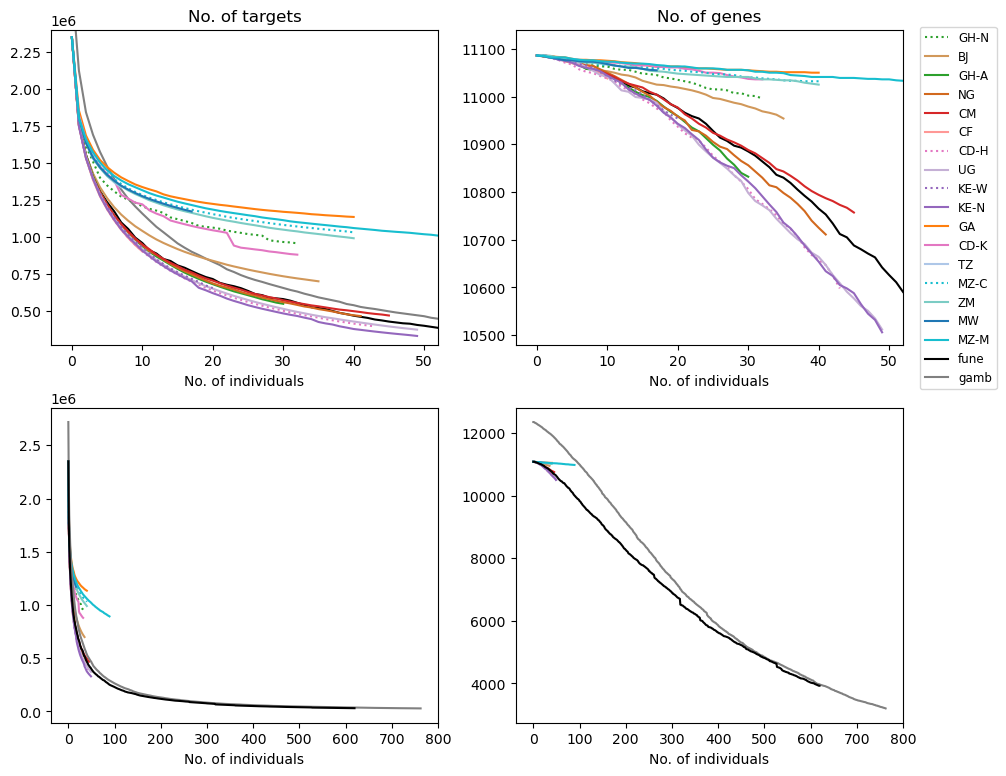

In [12]:
fig, axes = plt.subplots(2,2, figsize=(11,9))
for label in ['gamb', 'fune']:
    target_info = np.sum([np.load(f'{ddict[label]}/{ldict[label]}/target_info_{chrom}.npy'
                                 ) for chrom in chromdict[label]], axis=(0))
    axes[0,0].plot(np.arange(target_info.shape[0]), target_info[:,1], c=cdict[ldict[label]])
    axes[0,1].plot(np.arange(target_info.shape[0]), target_info[:,2], c=cdict[ldict[label]])
    axes[1,0].plot(np.arange(target_info.shape[0]), target_info[:,1], c=cdict[ldict[label]], 
               zorder=10)
    axes[1,1].plot(np.arange(target_info.shape[0]), target_info[:,2], c=cdict[ldict[label]], 
               zorder=10)
for label in cohorts:
    target_info = np.sum([np.load(f'cumulative_results/{ldict[label]}/target_info_{chrom}.npy'
                                 ) for chrom in ['2RL', '3RL', 'X']], axis=(0))
    axes[0,0].plot(np.arange(target_info.shape[0]), target_info[:,1], c=cdict[ldict[label]], 
               linestyle=sdict[label], label=label)
    axes[0,1].plot(np.arange(target_info.shape[0]), target_info[:,2], c=cdict[ldict[label]], 
               linestyle=sdict[label])
    axes[1,0].plot(np.arange(target_info.shape[0]), target_info[:,1], c=cdict[ldict[label]], 
               linestyle=sdict[label])
    axes[1,1].plot(np.arange(target_info.shape[0]), target_info[:,2], c=cdict[ldict[label]], 
               linestyle=sdict[label])


axes[0,0].set_title("No. of targets")
axes[0,1].set_title("No. of genes")
for ax in axes.flatten():
    ax.set_xlabel("No. of individuals")
for ax in axes[0,:]:
    ax.set_xlim(-3,52)
axes[0,0].set_ylim(270_000, 2_400_000)
axes[0,1].set_ylim(10_480, 11_140)
    
# get plotting handles
handles, labels = axes[0,0].get_legend_handles_labels()
#add fune
fune = plt.Line2D([], [], color='k', linestyle='-', label='fune')
handles.append(fune)
labels.append('fune')
#add gamb
gamb = plt.Line2D([], [], color='grey', linestyle='-', label='gamb')
handles.append(gamb)
labels.append('gamb')

fig.legend(handles = handles, labels=labels, loc = 'upper left', 
           bbox_to_anchor=(.91,.89), fontsize=8.5)
plt.savefig("cumulative_targets.svg")

In [7]:
totals = []
for label in ['gamb', 'fune']:
    target_info = np.sum([np.load(f'{ddict[label]}/{ldict[label]}/target_info_{chrom}.npy'
                                 ) for chrom in chromdict[label]], axis=(0))
    totals.append(target_info)

In [8]:
totals

[array([[        0,   2718188,     12356],
        [  5662434,   2123930,     12355],
        [  9163811,   1842399,     12349],
        ...,
        [107769399,     28530,      3215],
        [107828272,     28443,      3209],
        [107864915,     28421,      3203]]),
 array([[        0,   2349313,     11086],
        [  5443742,   1779618,     11086],
        [  8333386,   1552274,     11084],
        ...,
        [102086311,     30514,      3930],
        [102112333,     30490,      3929],
        [102147383,     30459,      3927]])]

In [9]:
totals[0][619,:]

array([101395578,     36155,      3973])

In [10]:
totals[0][30,:]

array([33240581,   653974,    12055])

In [11]:
totals[0][300,:]

array([80360337,    82246,     7349])